In [1]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
######################
####### 2019 #########
######################

# Initialize an empty list to store columns from each file
new_columns = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
               'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
               'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
               'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
               'property_type', 'price', 'availability_365', 'minimum_nights','last_scraped']

# Specify the path for the new CSV file
new_file_path = 'data_train/train_2019.csv'

# Initialize an empty DataFrame
df_combined = pd.DataFrame(columns=new_columns)

# File paths for different months
file_paths = ['data/2019/april/listings.csv',
              'data/2019/february/listings.csv',
              'data/2019/march/listings.csv']

# Read data from each file and append to the combined DataFrame
for file_path in file_paths:
    data = pd.read_csv(file_path, usecols=new_columns)
    df_temp = pd.DataFrame(data)
    df_combined = pd.concat([df_combined, df_temp], ignore_index=True)


# Write the combined DataFrame to a new CSV file and fix nan
# we may need to fix different nan values . PX an einai nan timi an einai nan kapoio boolean klp
#df_combined = df_combined.dropna()
df_combined.fillna(0, inplace=True)
df_combined.to_csv(new_file_path, index=False)
# Print the combined DataFrame
df_combined




,id,zipcode,transit,bedrooms,beds,review_scores_rating,number_of_reviews,neighbourhood,name,latitude,...,bed_type,bathrooms,accommodates,amenities,room_type,property_type,price,availability_365,minimum_nights,last_scraped
0,10595,11526,Note: 5-day ticket for all the public transpor...,3.0,5.0,97.0,19,Ambelokipi,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37.98888,...,Real Bed,2.0,8,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$73.00,222,1,2019-04-13
1,10988,11526,Note: 5-day ticket for all the public transpor...,2.0,2.0,92.0,31,Ambelokipi,"75m2, 2-br, metro, wi-fi, cable TV",37.98843,...,Real Bed,1.0,5,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$82.00,0,1,2019-04-13
2,10990,11526,Note: 5-day ticket for all the public transpor...,1.0,1.0,97.0,29,Ambelokipi,"50m2, Metro, WI-FI, cableTV, more",37.98783,...,Real Bed,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$49.00,234,1,2019-04-13
3,10993,115 26,Note: 5-day ticket for all the public transpor...,0.0,1.0,96.0,45,Ambelokipi,"Studio, metro, cable tv, wi-fi, etc",37.98861,...,Real Bed,1.0,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$38.00,226,1,2019-04-13
4,10995,11526,Note: 5-day ticket for all the public transpor...,1.0,1.0,95.0,17,Ambelokipi,"47m2, close to metro,cable TV,wi-fi",37.98950,...,Real Bed,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Entire home/apt,Apartment,$49.00,249,2,2019-04-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28117,32956579,104 42,0,1.0,1.0,0.0,0,Akadimia Platonos,Flat for 3 persons 10 minutes for center of At...,37.99614,...,Real Bed,1.0,4,"{""Air conditioning"",Kitchen,""Smoking allowed"",...",Private room,Apartment,$30.00,173,1,2019-03-11
28118,32958153,157 71,There is a bus stop two min from the house (3 ...,1.0,2.0,0.0,0,Ilisia,TRADITIONAL VINTAGE ROOM IN ATHENS 2,37.97539,...,Real Bed,2.0,3,"{TV,Wifi,Kitchen,Breakfast,Heating,Washer,""Smo...",Private room,House,$14.00,344,1,2019-03-11
28119,32958286,157 71,There is a bus stop two min from the house (3 ...,1.0,1.0,0.0,0,Ilisia,TRADITIONAL VINTAGE ROOM 3,37.97539,...,Real Bed,2.0,2,"{TV,Wifi,Kitchen,Breakfast,Heating,Washer,""Smo...",Private room,House,$14.00,344,1,2019-03-11
28120,32958368,157 71,There is a bus stop two min from the house (3 ...,1.0,1.0,0.0,0,Ilisia,TRADITIONAL SINGLE ROOM WITH PRIVET BALCONY,37.97539,...,Real Bed,2.0,1,"{TV,Wifi,Kitchen,Breakfast,Heating,Washer,""Smo...",Private room,House,$12.00,344,1,2019-03-11


In [16]:
# check for extreme values (logiko mono arithimitikes times px bathrooms,types,beds klp)
bedrooms_stats = df_combined['bedrooms'].describe()
filtered_column = df_combined.loc[df_combined['bedrooms'] > 40, ['id','bedrooms']]
print(filtered_column)
# Print the descriptive statistics
#print(bedrooms_stats)

Empty DataFrame
Columns: [id, bedrooms]
Index: []


In [3]:
# 2019 answers
# 1.1

most_common_room_type = df_combined['room_type'].value_counts().idxmax()

print(most_common_room_type)

Entire home/apt


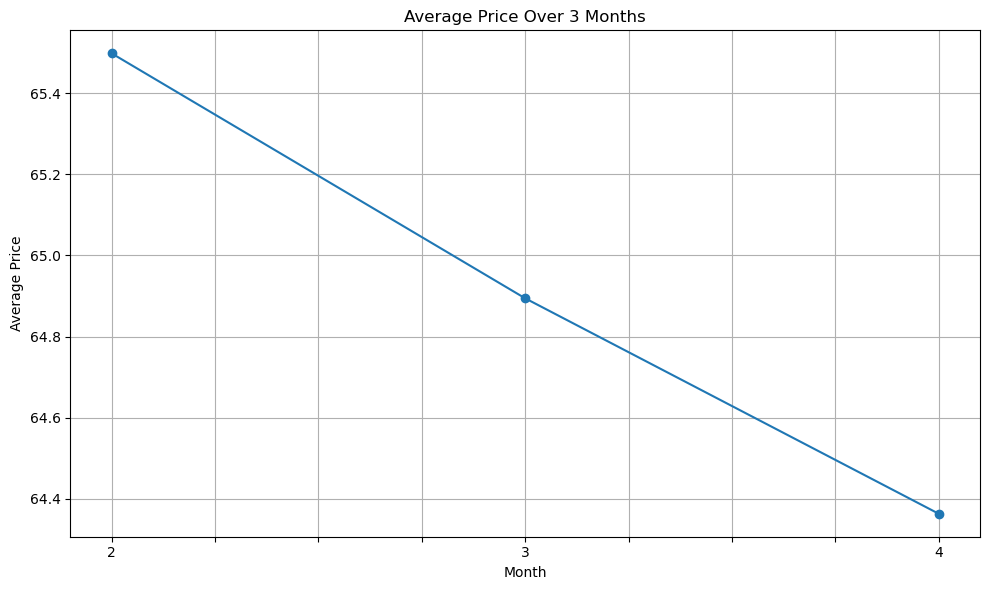

In [4]:
# 1.2
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('category')
# Clean the 'price' column by removing commas and dollar signs
df_combined['price'] = df_combined['price'].astype(str).str.replace(',', '').str.replace('$', '')

# Convert the 'price' column to float
df_combined['price'] = df_combined['price'].astype(float)
# Continue with the previous steps to calculate the monthly average price

# Group by month and calculate average price
monthly_avg_price = df_combined.groupby('month')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Over 3 Months')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

df_combined.to_csv(new_file_path, index=False)



In [5]:
# 1.3

# xazo to na katharisoume ta (Athens, Attiki, Greece),(Athens, Attika, Greece) ή (Athina, Attika), (Αθήνα, Attikhs) AFOU 
# DEN EINAI GEITONIES RE PANAGIOTAKI KAI DEN TA EXOUME AUTA GTXM
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
neighbourhood_reviews = df_combined.groupby('neighbourhood')['number_of_reviews'].sum()

neighbourhood_reviews_sorted = neighbourhood_reviews.sort_values(ascending=False)

# Select the top 5 neighbourhoods
top_5_neighbourhoods = neighbourhood_reviews_sorted.head()

# Print the result
print(top_5_neighbourhoods)



neighbourhood
Plaka           132361
Koukaki          90357
Neos Kosmos      83348
Psyri            54353
Metaxourgeio     44792
Name: number_of_reviews, dtype: object


In [6]:
# 1.4
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

properties = df_combined.groupby(['neighbourhood','month'])['id'].nunique()

neighborhood_total_counts = properties.groupby('neighbourhood').sum()

max_property = neighborhood_total_counts.idxmax()
max_number = neighborhood_total_counts.max()
print(max_property,max_number)
#number_of_properties = properties.value_counts().idxmax()

Plaka 3143


In [29]:
# 1.5
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

neighborhood_month_counts = df_combined.groupby(['neighbourhood', 'month'])['id'].nunique()
neighborhood_total_counts = neighborhood_month_counts.groupby('neighbourhood').sum()
#kataxoriseis ana geitonia(diaforetikes mallon?)
neighborhood_total_counts

neighborhood_month_id_counts = df_combined.groupby('month')['id'].count()

print(neighborhood_month_id_counts)

month
2.0    9100
3.0    9361
4.0    9661
Name: id, dtype: int64


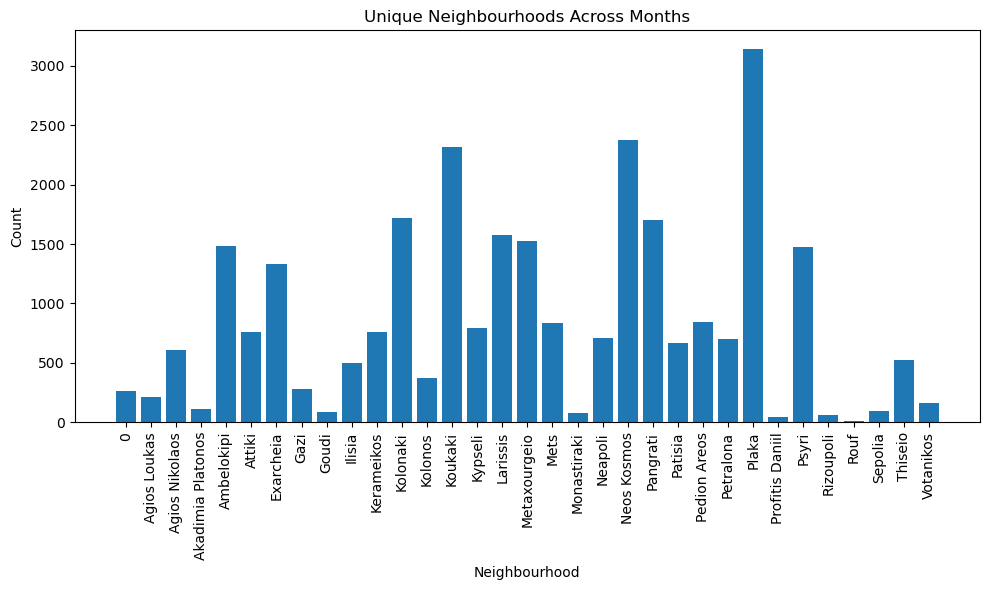

In [31]:
# 1.6
# Group the data by 'neighbourhood' and 'month' and count the number of unique neighborhoods
# unique_neighborhoods = df_combined.groupby(['neighbourhood', 'month'])['id'].size()
# unique_neighborhoods
# thelw na pethano den kanw plaka

df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

properties = df_combined.groupby(['neighbourhood','month'])['id'].nunique()

neighborhood_total_counts = properties.groupby('neighbourhood').sum()
# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_total_counts.index.get_level_values('neighbourhood'), neighborhood_total_counts)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Unique Neighbourhoods Across Months')

# Show the plot
plt.tight_layout()
plt.show()



In [55]:
# 1.7.
## NOMIZO META THA THELEI KAPOS NA EPANAFEREIS TA DIPLA STO DF ISOS KSANADIABAZONTAS TO ARXEIO KAI PERNONTAS TO STO IDIO df_combined
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])


# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

df_combined.drop_duplicates(subset=['id'])
room_type_counts = df_combined.groupby('neighbourhood')['room_type'].value_counts()

#properties = df_combined.groupby(['neighbourhood','month'])['id'].nunique()
#room_type_counts = df_combined.groupby(['neighbourhood', 'month', 'room_type']).size()
# room_type_counts = df_combined.groupby(['neighbourhood', 'month'])['room_type'].size()
room_type_counts
#properties


neighbourhood      room_type      
0                  Entire home/apt     220
                   Private room         40
                   Shared room           1
Agios Loukas       Entire home/apt     177
                   Private room         29
                   Shared room           3
Agios Nikolaos     Entire home/apt     524
                   Private room         87
Akadimia Platonos  Entire home/apt      92
                   Private room         21
                   Shared room           1
Ambelokipi         Entire home/apt    1386
                   Private room         92
                   Shared room           4
Attiki             Entire home/apt     647
                   Private room        111
Exarcheia          Entire home/apt    1171
                   Private room        159
Gazi               Entire home/apt     240
                   Private room         35
                   Shared room           7
Goudi              Entire home/apt      63
                   

In [ ]:
###### 2023 ######

#==========>>> diaforetikh mpala edw gt den iparxoun ola sto listings !!!!!!!!!!!!!

# Initialize an empty list to store columns from each file
new_columns = [ 'id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews',
                'neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since',
                'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
                'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 
                'property_type', 'price', 'availability_365', 'minimum_nights' ]

# Specify the path for the new CSV file
new_file_path = 'data_train/train_2023.csv'

######################
####### june ########
######################

file_path = 'data/2023/june/listings.csv'

data = pd.read_csv(file_path, usecols= new_columns)

df = pd.DataFrame(data)

# Write the DataFrame to a new CSV file
df.to_csv(new_file_path, index=False)
print("New CSV file created successfully for april")

#######################
###### march #######
#######################

file_path = 'data/2023/march/listings.csv'

data = pd.read_csv(file_path, usecols= new_columns)

df = pd.DataFrame(data)

# Write the DataFrame to a new CSV file
df.to_csv(new_file_path, index=False)
print("New CSV file created successfully for febrouary")

####################
###### september #######
####################

file_path = 'data/2023/september/listings.csv'

data = pd.read_csv(file_path, usecols= new_columns)

df = pd.DataFrame(data)

# Write the DataFrame to a new CSV file
df.to_csv(new_file_path, index=False)
print("New CSV file created successfully for march")

# Print
df